In [1]:
#Importing Various Libraries ,models,metrics ,model_selection 


from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("../input/breast-cancer-dataset/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#Trying to find Outliers using percentile method.(IQR method) Here g=df.corr() of every column which dtype is not a object
#1.5 times IQR + 75th percentile (Any Number greater than this is Outlier)
#25th percentile - 1.5 times IQR (Any Number less than is Outlier)

for i in list(df.select_dtypes(exclude='object'))[1:]:
  g,l=np.percentile(df[i],[75,25])
  drop_ind=df[(df[i]>(2.5*g+1.5*l))&(df[i]<(-1.5*g-0.5*l))].index
  df.drop(drop_ind,axis=0)

In [5]:
#Here dependent col that is target column is an object type column we can encode that using OneHotEncoder or LabelEncoder which can imported from sklearn.preprocessing.
#Here I encoded them using replace which same as using LabelEncoder


df['diagnosis']=df['diagnosis'].replace('B',0)
df['diagnosis']=df['diagnosis'].replace('M',1)

In [6]:
#spliting data into train and test datasets

x=df.drop('diagnosis',axis=1)
y=df['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


#Here We try various models to find best score
models = []
models.append(('RandomForestRegression',RandomForestClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LinearDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
model_scores={}
for i,name in models:
  model=name
  model.fit(x_train,y_train)
  model_scores[i]=np.mean(y_test==model.predict(x_test))

In [7]:
model_scores

{'RandomForestRegression': 0.9473684210526315,
 'LogisticRegression': 0.631578947368421,
 'LinearDA': 0.9473684210526315,
 'KNN': 0.8333333333333334,
 'GaussianNB': 0.631578947368421,
 'SVM': 0.631578947368421}

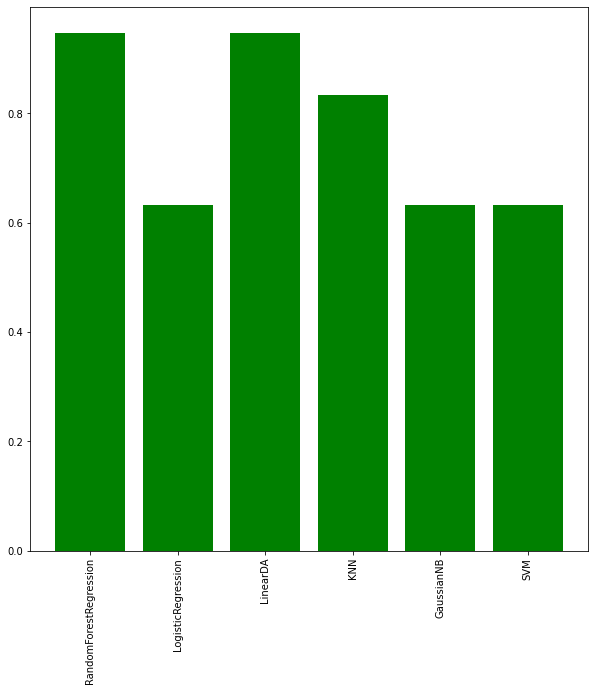

In [8]:
names=list(model_scores.keys())
values=list(model_scores.values())
fig,ax=plt.subplots(figsize=(10,10))
ax=plt.bar(names,values,color='green');
plt.xticks(rotation=90);

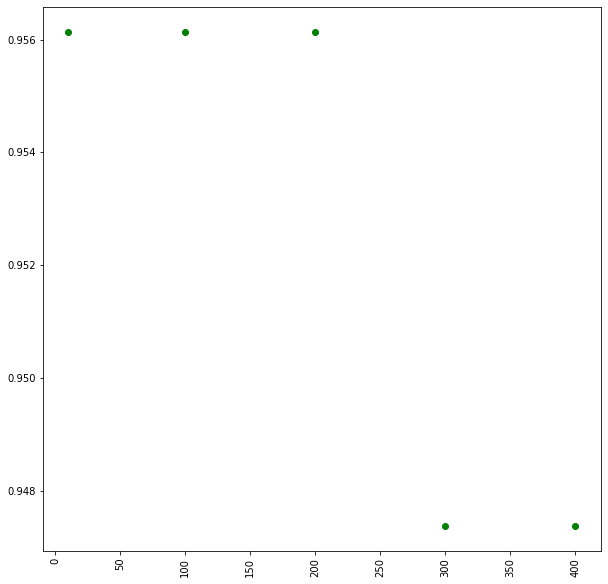

In [9]:
#From Graph we can say Using RandomForestClassifier or using model LinearDA gives best score.I choose to use RandomForestClassifier and tried various n_estimators 

n_estimators=[10,100,200,300,400]
score={}
for i in n_estimators:
    model=RandomForestClassifier(n_estimators=i)
    model.fit(x_train,y_train)
    y_preds=model.predict(x_test)
    score[i]=np.mean(y_test==y_preds)

#ploting the result
names=list(score.keys())
values=list(score.values())
fig,ax=plt.subplots(figsize=(10,10))
ax=plt.scatter(names,values,color='green');
plt.xticks(rotation=90);

In [10]:
#we can observe using 10,100,200,300 gave same score using 400 gave low score so we choose any one of the extimator

final_model=RandomForestClassifier(n_estimators=300)
final_model.fit(x_train,y_train)
y_preds=final_model.predict(x_test)
np.mean(y_test==y_preds)

0.9473684210526315

In [11]:
#output should be of dtype='object' so we use replace so that y_preds(output) will be of d_type='object'

y_preds=pd.DataFrame(y_preds,columns=['diagnosis'])
y_preds['diagnosis']=y_preds['diagnosis'].replace(0,'B')
y_preds['diagnosis']=y_preds['diagnosis'].replace(1,'M')

In [12]:
y_preds.head()

,diagnosis
0,M
1,M
2,B
3,M
4,B
